<a href="https://colab.research.google.com/github/lalitharode/Hotel-booking-analysis/blob/main/Copy_of_Hotel_Booking_Analysis_by_lalit_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone project/Hotel Bookings.csv')

# Lets check the important parameter and remove unneccesary columns

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df['hotel']

0         Resort Hotel
1         Resort Hotel
2         Resort Hotel
3         Resort Hotel
4         Resort Hotel
              ...     
119385      City Hotel
119386      City Hotel
119387      City Hotel
119388      City Hotel
119389      City Hotel
Name: hotel, Length: 119390, dtype: object

**Check the number of items in each columns**

In [ ]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [ ]:
# type of hotels available  there for customers
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
# rooms available in hotels
df['assigned_room_type'].value_counts()


A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [ ]:
df['reserved_room_type'].value_counts()


A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [ ]:
df['customer_type'].value_counts()


Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# As we have found here agent may be a person who work as a broker. 

In [ ]:
# In this data there is many null values in agent details so we will try to fill it max repeating agent
df['agent']
df.agent.mode()

0    9.0
dtype: float64

In [ ]:
df['agent'].fillna(value=9.0, inplace=True)

Lets check compony column

In [ ]:
df['company']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
119385   NaN
119386   NaN
119387   NaN
119388   NaN
119389   NaN
Name: company, Length: 119390, dtype: float64

In [ ]:
# in compony column there is a lot of null values and we dont have given any idea about this so we can remove this
df.drop(columns='company',axis=1,inplace=True)

In [ ]:
#so here we can see we have remove a company column succesfully
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# we have found a some null values in country columns and dont have given any idea about this so we can remove it 


In [ ]:
df.drop(columns='country',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Maximum booking period

In [ ]:
# Lets check maximu booking schedule

In [ ]:
max_booking_month=df['arrival_date_month'].value_counts()
max_booking_month

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

Text(0, 0.5, 'booking counts')

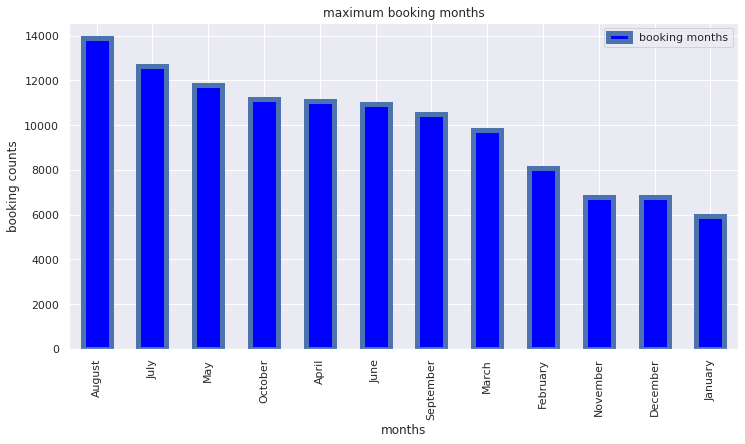

In [ ]:
#  this arrival date month data shows that the maximum number of booking got in august month

plt.figure(figsize=(12,6))
max_booking_month.plot(kind='bar',color='blue',label='booking months',edgecolor='b',linewidth=5)
plt.legend()

plt.title('maximum booking months')
plt.xlabel('months')
plt.ylabel('booking counts')

In [ ]:
# so we have concluded in january month least booking found and in august maximum booking

In [ ]:
# so will find the maximum number of booking based on date in a august month

In [ ]:
maximum_date_day_of_august_month=df[df['arrival_date_month']=='August']['arrival_date_day_of_month'].value_counts()
maximum_date_day_of_august_month

14    632
8     555
17    531
15    527
18    507
3     503
1     502
10    493
12    491
25    486
7     472
20    467
13    465
28    462
5     460
24    459
26    458
16    448
11    437
22    424
19    419
27    415
29    398
4     389
21    388
6     381
31    377
9     351
2     337
30    322
23    321
Name: arrival_date_day_of_month, dtype: int64

Text(0, 0.5, 'counts')

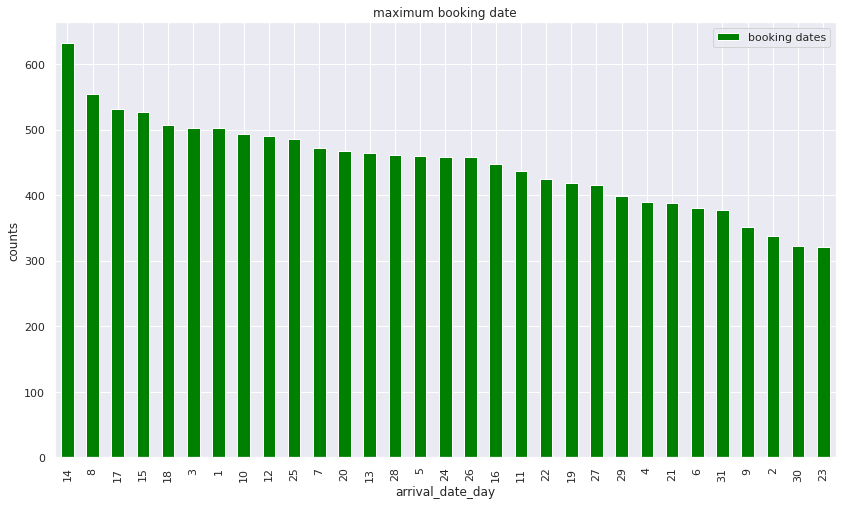

In [ ]:
plt.figure(figsize=(14,8))

maximum_date_day_of_august_month.plot(kind='bar',color='green',label='booking dates')
plt.legend()
plt.title('maximum booking date')
plt.xlabel('arrival_date_day')
plt.ylabel('counts')


In [ ]:
# so the mostly booking found in between 14 to 20 august
# The hotel management should arrange the staff and other services according to this booking dates 
# to minimise their liabilities and it will help them to increase their income 

#Preference to book a hotel by the customers

Text(0, 0.5, 'counts')

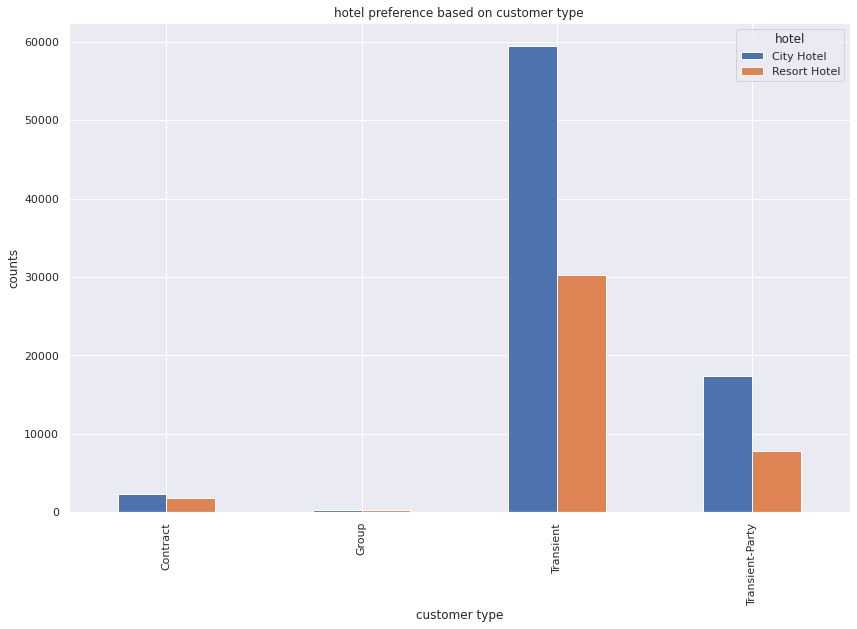

In [ ]:
hotel_preference_based_on_customer_type=df.groupby(['customer_type','hotel'])['hotel'].count().unstack()

ax=hotel_preference_based_on_customer_type.plot.bar(figsize=(14,9))
ax.set_title('hotel preference based on customer type')
ax.set_xlabel('customer type')
ax.set_ylabel('counts')


In [ ]:
# Transient type customers are booking maximum  hotels and group type are minimum
# all type of customers are booking more city hotels as compared to resort hotels 
# So here we get a two output:
# (1) We should also focus on a "contract customers", "group customers" ,"transient_party customers" to inhance the booking
# also we get a maximum bookings are found in a city hotels so the funding should arrange accordingly.

## stays duration

In [ ]:
# total stays will be based on week nights and weekend nights
df['total_stays']=df['stays_in_week_nights']+df['stays_in_weekend_nights']

In [ ]:
df['total_stays'].value_counts()

2     27643
3     27076
1     21020
4     17383
7      8655
5      7784
6      3857
8      1161
10     1139
14      916
9       841
0       715
11      396
12      223
13      142
15       75
21       71
16       40
25       37
18       35
28       35
19       22
17       20
29       14
20       14
22       14
30       13
23        8
24        6
26        6
27        5
35        5
42        4
33        3
56        2
34        1
57        1
49        1
48        1
69        1
38        1
45        1
60        1
46        1
43        1
Name: total_stays, dtype: int64

In [ ]:
df[df['total_stays']!=0]['customer_type'].value_counts()

Transient          89007
Transient-Party    25038
Contract            4059
Group                571
Name: customer_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'count of days')

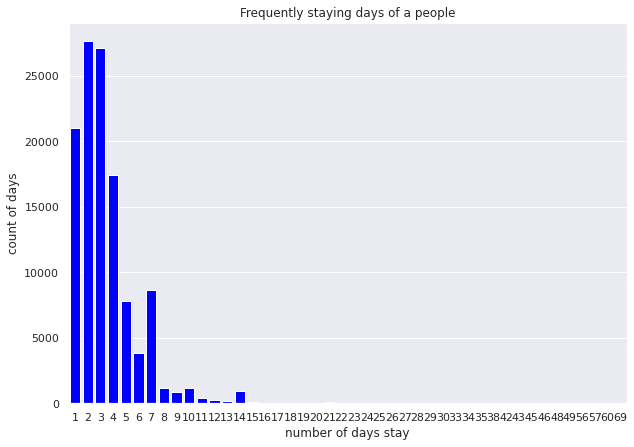

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(df[df['total_stays']!=0]['total_stays'],facecolor='blue')
plt.title('Frequently staying days of a people')
plt.xlabel('number of days stay')
plt.ylabel('count of days')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5ffd20df10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5ffd211150>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5ffd20d190>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5ffd1cb2d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5ffd2610d0>],
 'means': []}

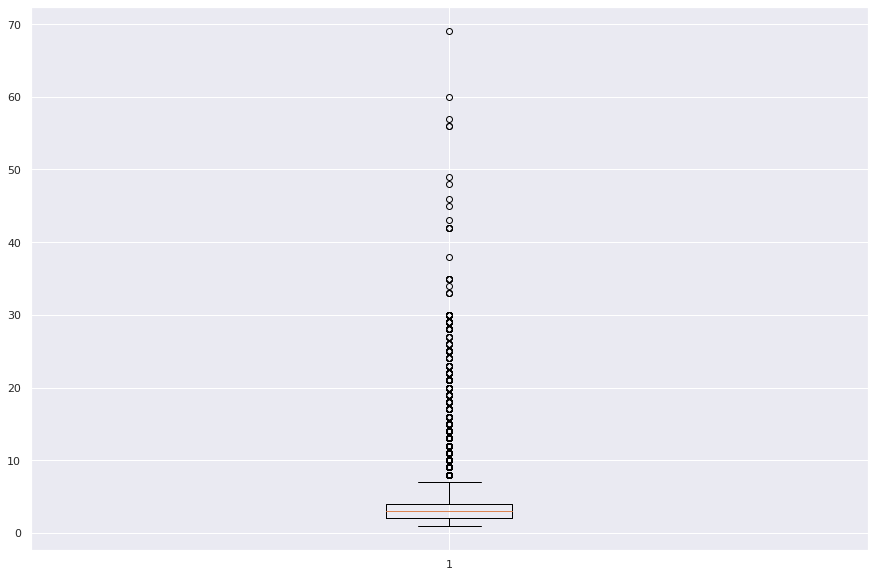

In [ ]:
# same thing we can see in a box plot ass well
plt.figure(figsize=(15,10))
plt.boxplot(df[df['total_stays']!=0]['total_stays'])

In [ ]:
# As from above graph report we can see that maximum peoples stay 2 to 3 days
# According to data we will chech further to find out the stay duration more than 14 days
# so we will check whether they are staying for a 14 days or more also
df[df['total_stays']>14]['total_stays'].value_counts()

15    75
21    71
16    40
25    37
18    35
28    35
19    22
17    20
20    14
22    14
29    14
30    13
23     8
24     6
26     6
35     5
27     5
42     4
33     3
56     2
46     1
60     1
69     1
45     1
38     1
48     1
49     1
57     1
34     1
43     1
Name: total_stays, dtype: int64

In [ ]:
# we can see there is a lot of people who are staying foe avg. 25*30 days also

# Cancellation rate and reasons for cancelling

0    75165
1    43030
Name: is_canceled, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


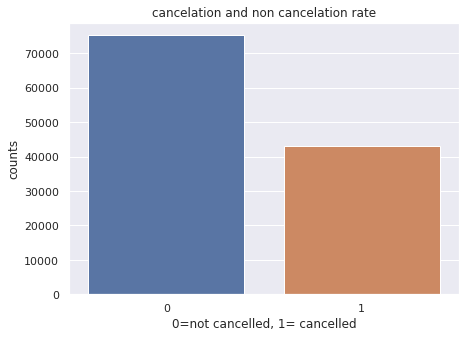

In [ ]:
#lets check the cancel rate

plt.figure(figsize=(7,5))
ax = sns.countplot(df['is_canceled'])
plt.title('cancelation and non cancelation rate')
plt.xlabel('0=not cancelled, 1= cancelled')
plt.ylabel('counts')
without_hue=(ax, df['is_canceled'])
print(df['is_canceled'].value_counts())



In [ ]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    28937
1    10837
Name: is_canceled, dtype: int64


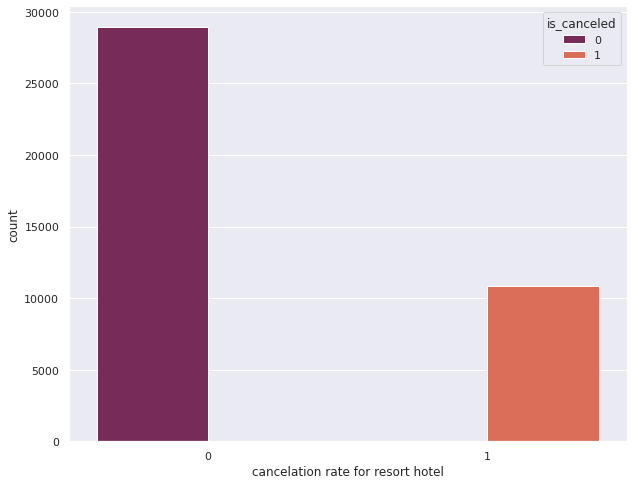

In [ ]:
# lets check the cancelation rate for resort hotel 
plt.figure(figsize=(10,8))
ax=sns.countplot(df[df['hotel']=='Resort Hotel']['is_canceled'],palette="rocket", hue=df['is_canceled'])
without_hue=(ax,df[df['hotel']=='Resort Hotel']['is_canceled'])
plt.xlabel('cancelation rate for resort hotel')
print(df[df['hotel']=='Resort Hotel']['is_canceled'].value_counts())



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    46228
1    32193
Name: is_canceled, dtype: int64


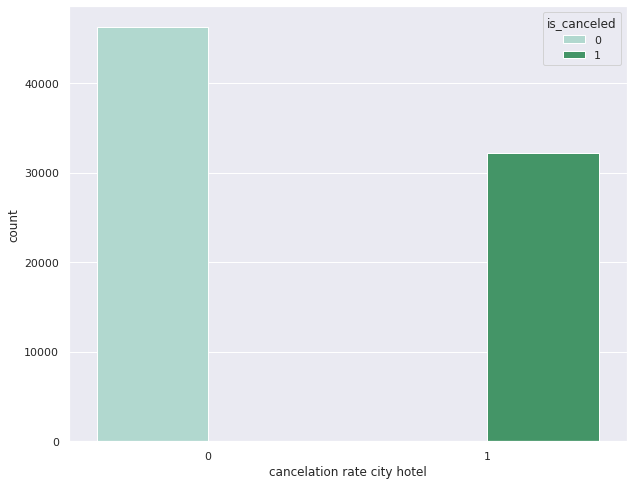

In [ ]:
# lets check the cancelation rate for  city hotel 
plt.figure(figsize=(10,8))
ax=sns.countplot(df[df['hotel']=='City Hotel']['is_canceled'],palette="BuGn", hue=df['is_canceled'])
without_hue=(ax,df[df['hotel']=='City Hotel']['is_canceled'])
plt.xlabel('cancelation rate city hotel')
print(df[df['hotel']=='City Hotel']['is_canceled'].value_counts())


Text(0, 0.5, 'calcelled count')

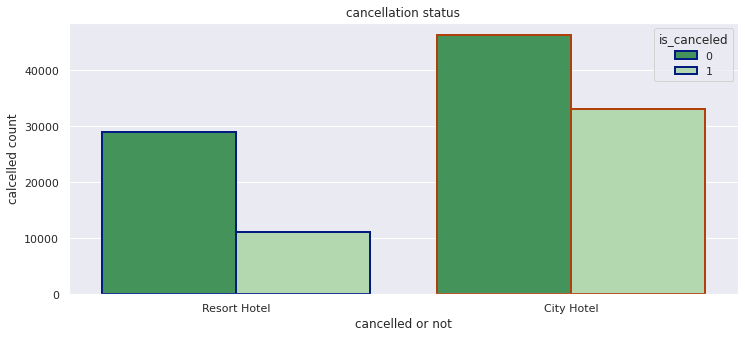

In [ ]:
# lets see the cancelation rate chart in one chart
plt.figure(figsize=(12,5))
bx=sns.countplot(x='hotel',hue='is_canceled',data=df,palette="Greens_r",edgecolor=sns.color_palette("dark", 3),linewidth=2)
plt.title('cancellation status')
plt.xlabel( 'cancelled or not')
plt.ylabel('calcelled count')

In [ ]:
# We have seen here that the cancellation rate of city hotels as compared to the resort  is also hish

Lets check the possible reasons for cancellation



1. reservered and assigned room impact

2. Which customer type tend to cancel more

3. Type of deposit

other ques

when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?

[ ]

In [ ]:
df1=df.copy()

In [ ]:
df1['reserved_room_type'].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

Text(0, 0.5, 'counts of rooms')

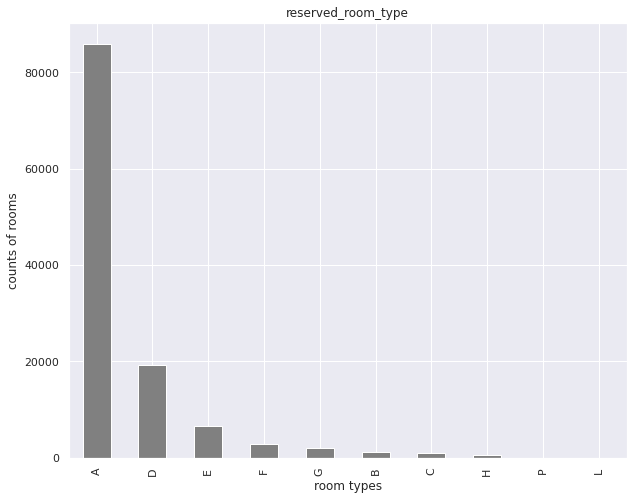

In [ ]:
#lets check the max reserved room
reserved_room=df['reserved_room_type'].value_counts()
reserved_room.plot(kind='bar',figsize=(10,8),color='gray')
plt.title('reserved_room_type')
plt.xlabel('room types')
plt.ylabel('counts of rooms')

In [ ]:
df1['assigned_room_type'].value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

Text(0, 0.5, 'counts of rooms')

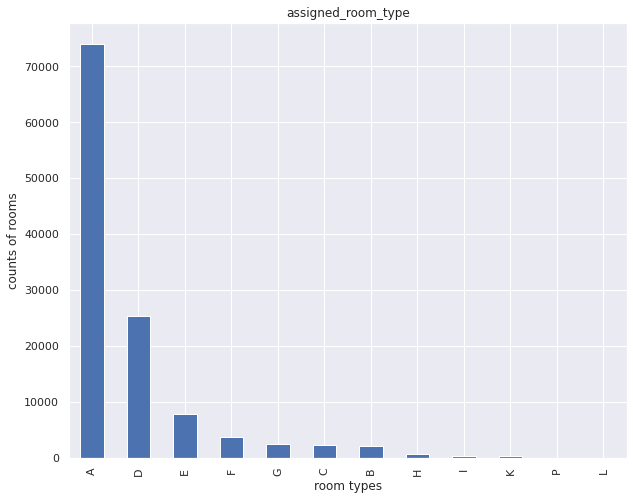

In [ ]:
#lets check the max assigned room
assigned_rooms=df['assigned_room_type'].value_counts()
assigned_rooms.plot(kind='bar',figsize=(10,8))
plt.title('assigned_room_type')
plt.xlabel('room types')
plt.ylabel('counts of rooms')




---



In [ ]:
# so we have 10 types of rooms
different_assigned_rooms = df1[df1['reserved_room_type'] != df1['assigned_room_type']]

In [ ]:
different_assigned_rooms['is_canceled'].value_counts()

0    14115
1      802
Name: is_canceled, dtype: int64

In [ ]:
total=14114+802
cancelled_after_different_room_assigned=802

In [ ]:
print('Percentage of people impact with different room assigned', cancelled_after_different_room_assigned/total*100 )

Percentage of people impact with different room assigned 5.376776615714669


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'cancelation of rooms')

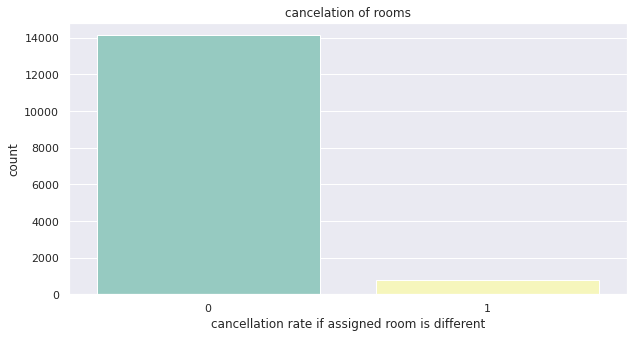

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(different_assigned_rooms['is_canceled'], palette="Set3")
plt.xlabel('cancellation rate if assigned room is different')
plt.title('cancelation of rooms')


In [ ]:
# Different type of room afffects the cancelation
#here cancelation due to different room assigned is 5.37%


In [ ]:
df1['customer_type'].value_counts()


Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


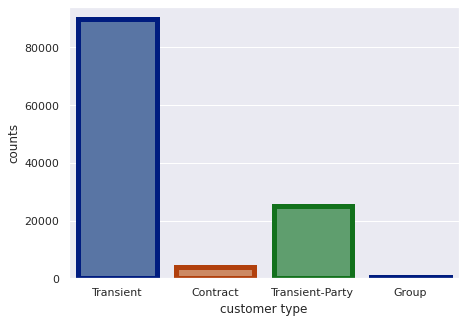

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.countplot(df1['customer_type'],  linewidth=5, edgecolor=sns.color_palette("dark", 3))
plt.xlabel('customer type')
plt.ylabel('counts')
without_hue=ax, df1['customer_type']

In [ ]:
# lets check the cancelation rate based on customer type
df1[df1['customer_type']=='Transient']['is_canceled'].value_counts()

0    53099
1    36514
Name: is_canceled, dtype: int64

Text(0, 0.5, 'counts')

<Figure size 720x576 with 0 Axes>

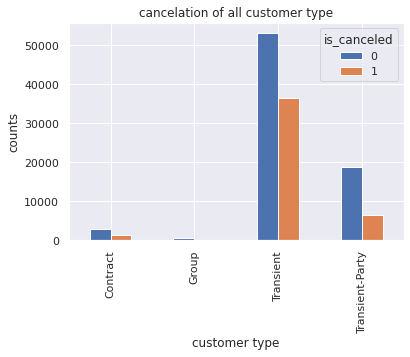

In [ ]:
# lets see the cancelation rate as per customer type
plt.figure(figsize=(10,8))
cancelation_based_on_customer=df.groupby(['customer_type','is_canceled'])['is_canceled'].count().unstack()
ax=cancelation_based_on_customer.plot(kind='bar')
plt.title('cancelation of all customer type')
plt.xlabel('customer type')
plt.ylabel('counts')

In [ ]:
# we seen that the transient customers are cancelled maximum booking

In [ ]:
# check percentage of different customer types cancelation
transient_cancel =  df1[df1['customer_type'] == 'Transient']['is_canceled'].value_counts()[1]/df1['customer_type'].value_counts().values[0]*100

In [ ]:
transient_Party_cancel=df1[df1['customer_type']=='Transient-Party']['is_canceled'].value_counts()[1]/df1['customer_type'].value_counts().values[1]*100

In [ ]:
Contract_cancel= df1[df1['customer_type']=='Contract']['is_canceled'].value_counts()[1]/df1['customer_type'].value_counts().values[2]*100

In [ ]:
Group_cancel=df1[df1['customer_type']=='Group']['is_canceled'].value_counts()[1]/df1['customer_type'].value_counts()[3]*100

In [ ]:
print('percentage of cancelation of transient type customer is =',transient_cancel,'%')
print('percentage of cancelation of transient Party type customer is =',transient_Party_cancel,'%')
print('percentage of cancelation of Contract type customer is =',Contract_cancel,'%')
print('percentage of cancelation of group type customer is =',Group_cancel,'%')

percentage of cancelation of transient type customer is = 40.746320288351015 %
percentage of cancelation of transient Party type customer is = 25.42986785543703 %
percentage of cancelation of Contract type customer is = 30.96172718351325 %
percentage of cancelation of group type customer is = 10.22530329289428 %


In [ ]:
# lets check the type of deposit 

df1['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'counts')

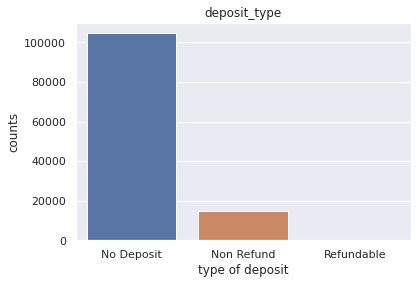

In [ ]:
plt.plot(figsize=(10,7))
sns.countplot(df1['deposit_type'],order=df1['deposit_type'].sort_values(ascending=True).value_counts().index)
plt.title('deposit_type')
plt.xlabel('type of deposit')
plt.ylabel('counts')

In [ ]:
# lets check whether no deposit types customers are cancelling more or others type
no_deposit_type_cancelled=df1[df1['deposit_type']=='No Deposit']['is_canceled'].value_counts()[1]/df1['deposit_type'].value_counts().values[0]*100
non_refund_type_cancelled=df1[df1['deposit_type']=='Non Refund']['is_canceled'].value_counts()[1]/df1['deposit_type'].value_counts().values[1]*100
refundable_type_cancelled=df1[df1['deposit_type']=='Refundable']['is_canceled'].value_counts()[1]/df1['deposit_type'].value_counts().values[2]*100


In [ ]:
print('no_deposit_type_cancelled=',no_deposit_type_cancelled)
print('non_refund_type_cancelled=',non_refund_type_cancelled)
print('refundable_type_cancelled=',refundable_type_cancelled)

no_deposit_type_cancelled= 28.377022390841066
non_refund_type_cancelled= 99.36244601357373
refundable_type_cancelled= 22.22222222222222


# booking based factors

In [ ]:
# Lets find out the sources of a booking 

In [ ]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


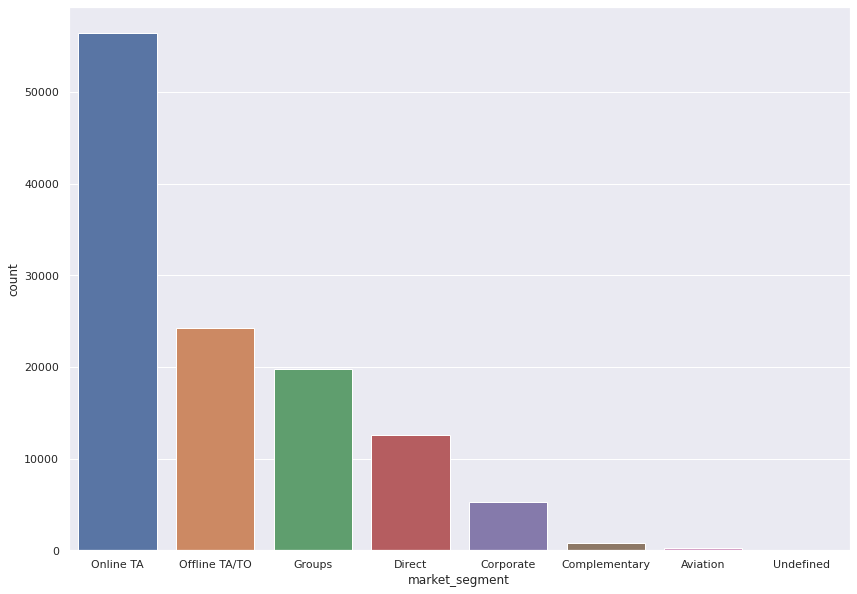

In [ ]:
plt.figure(figsize= (14,10))
sns.countplot(df['market_segment'],order=df['market_segment'].value_counts().index)

In [ ]:
# maximum bookings are getting from the online TA and offline TA bokking is also arround 50% of online TA 
# hotel management should give a efforts to increase offline booking alo

In [ ]:
# type of customers by online booking
Customer_type_by_online_booking=df[df['market_segment']=='Online TA']['customer_type'].value_counts()
Customer_type_by_online_booking

Transient          51299
Transient-Party     3513
Contract            1486
Group                179
Name: customer_type, dtype: int64

In [ ]:
# type of customers by offline booking
Customer_type_by_offline_booking=df[df['market_segment']=='Offline TA/TO']['customer_type'].value_counts()
Customer_type_by_offline_booking

Transient          14054
Transient-Party     8137
Contract            1817
Group                211
Name: customer_type, dtype: int64

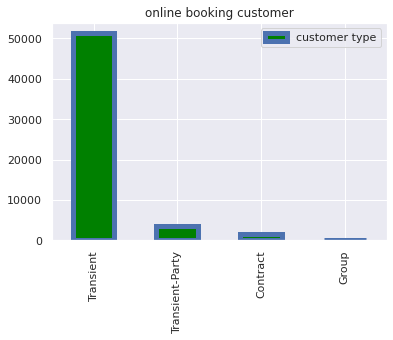

In [ ]:
# online cutomers type
Customer_type_by_online_booking.plot(kind='bar',label='customer type',color='green',edgecolor='b',linewidth=5)
plt.title('online booking customer')
plt.legend()

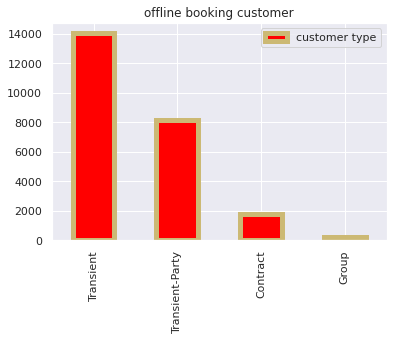

In [ ]:
# offline customer type
Customer_type_by_offline_booking.plot(kind='bar',label='customer type',color='red',edgecolor='y',linewidth=5)
plt.title('offline booking customer')
plt.legend()

In [ ]:
# So by online TA booking there is aslo a maximum customers from transient type

0    114430
1      3765
Name: is_repeated_guest, dtype: int64


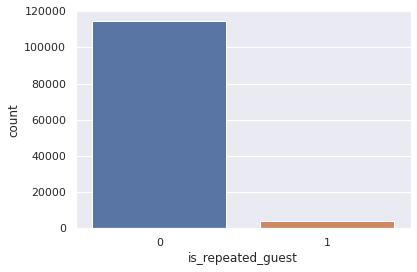

In [ ]:
# we will see whether the customers are repeated guest or not 
plt.plot(figsize=(12,8))
sns.countplot(x='is_repeated_guest',data=df,pe)
print(df['is_repeated_guest'].value_counts())


In [ ]:
# repeating customer percentage
total=114430+3765
repeating_customer_percentage=3765/total*100
print('repeating_customer_percentage',repeating_customer_percentage,'%')

repeating_customer_percentage 3.185413934599602 %


In [ ]:
# So the less number of customers are arriving again 
# So hotel management should give a better facilities and a good services 
# may be the reason based on a poor services

#Average daily rate

In [ ]:
df['adr'].describe()

count    119390.000000
mean        101.831122
std          50.535790
min          -6.380000
25%          69.290000
50%          94.575000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [ ]:
# there is a minimum value is -6 so we can remove it because it is a wrong entry given 

In [ ]:
df.drop(df[df['adr']<0].index,axis=0 ,inplace=True)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [ ]:
df['adr'].describe()

count    119389.000000
mean        101.832028
std          50.535032
min           0.000000
25%          69.290000
50%          94.590000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [ ]:
#we have successfully removed 'adr' which has less than 0 value

In [ ]:
# checking the average daily rate when booking is not cancelled 
df[df['is_canceled']==0]['adr'].describe()

count    75165.000000
mean        99.989108
std         49.205061
min          0.000000
25%         67.500000
50%         92.500000
75%        125.000000
max        510.000000
Name: adr, dtype: float64

In [ ]:
# check if cancilation is 0, average daily rate is 0, total stays is also 0
df[df['is_canceled']==0][df['adr']==0][df['total_stays']==0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,...,No Deposit,240.0,0,Transient,0.0,0,2,Check-Out,2015-07-06,0
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,...,No Deposit,250.0,0,Transient,0.0,0,0,Check-Out,2015-07-06,0
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,1,Check-Out,2015-07-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2017,July,27,6,0,0,1,...,No Deposit,14.0,0,Transient-Party,0.0,0,0,Check-Out,2017-07-06,0
117701,City Hotel,0,0,2017,August,32,8,0,0,2,...,No Deposit,262.0,0,Transient,0.0,0,0,Check-Out,2017-08-08,0
118029,City Hotel,0,0,2017,August,33,14,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2017-08-14,0
118631,City Hotel,0,78,2017,August,34,23,0,0,1,...,No Deposit,98.0,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23,0


In [ ]:
# here there is some entries which has cancillation is 0, average daily rate is 0, total stays is 0. so its a wrong entries

In [ ]:
# this wrong entries will save in a new variable
df_with_wrong_reservation_type=df[df['is_canceled']==0][df['adr']==0][df['total_stays']==0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
# So we will replace the "checkout" status by "No-show" because this "checkout" entries is wrong in above condition
df_with_wrong_reservation_type['reservation_status']=df_with_wrong_reservation_type['reservation_status'].replace(['Check-Out', 'No-Show'])

In [ ]:
df_with_right_reservation_type=df_with_wrong_reservation_type

In [ ]:
df_with_wrong_reservation_type.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stays
count,680.0,680.000000,680.000000,680.000000,680.000000,680.0,680.0,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.0,680.00000,680.000000,680.0
mean,0.0,29.026471,2015.970588,28.777941,15.660294,0.0,0.0,1.572059,0.072059,0.007353,0.447059,0.011765,0.132353,0.295588,91.719118,0.144118,0.0,0.02500,0.504412,0.0
std,0.0,65.694405,0.648337,15.804935,8.543446,0.0,0.0,0.680541,0.333388,0.085496,0.497555,0.132418,0.944785,0.765211,111.409720,3.758128,0.0,0.15624,0.724072,0.0
min,0.0,0.000000,2015.000000,1.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.00000,0.000000,0.0
25%,0.0,0.000000,2016.000000,14.750000,8.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.0,0.00000,0.000000,0.0
50%,0.0,1.000000,2016.000000,29.000000,16.000000,0.0,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.0,0.00000,0.000000,0.0
75%,0.0,24.000000,2016.000000,44.000000,23.000000,0.0,0.0,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,240.000000,0.000000,0.0,0.00000,1.000000,0.0
max,0.0,737.000000,2017.000000,53.000000,31.000000,0.0,0.0,3.000000,2.000000,1.000000,1.000000,2.000000,15.000000,7.000000,464.000000,98.000000,0.0,1.00000,3.000000,0.0


In [ ]:
df['reservation_status'].value_counts()

Check-Out    75165
Canceled     43017
No-Show         13
Name: reservation_status, dtype: int64

In [ ]:
df[df['reservation_status']=='No-Show']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays
19503,Resort Hotel,1,11,2015,December,52,23,0,0,2,...,No Deposit,241.0,0,Transient,0.0,0,1,No-Show,2015-12-23,0
19823,Resort Hotel,1,23,2016,January,2,4,0,0,2,...,No Deposit,314.0,0,Transient,0.0,0,0,No-Show,2016-01-04,0
23734,Resort Hotel,1,29,2016,April,18,30,0,0,2,...,No Deposit,240.0,0,Transient,0.0,0,1,No-Show,2016-04-30,0
25333,Resort Hotel,1,7,2016,June,26,21,0,0,1,...,No Deposit,339.0,0,Transient,0.0,0,0,No-Show,2016-06-21,0
25564,Resort Hotel,1,123,2016,July,27,1,0,0,2,...,No Deposit,240.0,0,Transient,0.0,0,1,No-Show,2016-07-01,0
28550,Resort Hotel,1,10,2016,October,41,8,0,0,2,...,No Deposit,9.0,0,Transient-Party,0.0,0,1,No-Show,2016-10-08,0
83165,City Hotel,1,11,2016,January,4,22,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,1,No-Show,2016-01-22,0
83564,City Hotel,1,1,2016,February,6,6,0,0,1,...,No Deposit,9.0,0,Transient,0.0,0,0,No-Show,2016-02-06,0
84457,City Hotel,1,1,2016,February,9,26,0,0,1,...,No Deposit,9.0,0,Transient,0.0,0,0,No-Show,2016-02-26,0
84488,City Hotel,1,3,2016,February,9,26,0,0,1,...,No Deposit,9.0,0,Transient,0.0,0,1,No-Show,2016-02-26,0


In [ ]:
# here some customers reservation status showd no-show but they stayed in hotel for some days.
# we need to replace this with checkout where stays is not equal to zero

In [ ]:
df[df['reservation_status'] == 'No-Show'][df['total_stays'] != 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays
122,Resort Hotel,1,36,2015,July,27,4,0,1,1,...,No Deposit,250.0,0,Transient,123.00,0,0,No-Show,2015-07-04,1
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,...,No Deposit,8.0,0,Contract,133.16,0,1,No-Show,2015-07-12,14
343,Resort Hotel,1,47,2015,July,29,12,2,3,2,...,No Deposit,241.0,0,Transient,103.80,0,0,No-Show,2015-07-12,5
467,Resort Hotel,1,6,2015,July,29,17,0,2,2,...,No Deposit,241.0,0,Transient,110.50,0,1,No-Show,2015-07-17,2
472,Resort Hotel,1,3,2015,July,29,17,0,2,1,...,No Deposit,5.0,0,Transient,107.60,0,0,No-Show,2015-07-17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97968,City Hotel,1,0,2016,October,42,10,1,2,1,...,No Deposit,9.0,0,Transient,153.00,0,0,No-Show,2016-10-10,3
108459,City Hotel,1,31,2017,July,29,16,2,0,1,...,No Deposit,9.0,0,Transient,135.00,0,2,No-Show,2017-07-16,2
108829,City Hotel,1,25,2017,May,18,6,2,1,1,...,No Deposit,9.0,0,Transient,125.00,0,0,No-Show,2017-05-06,3
111925,City Hotel,1,6,2017,July,29,17,1,0,1,...,No Deposit,9.0,0,Transient,65.00,0,0,No-Show,2017-07-17,1


In [ ]:
# there is a 1194 rows where reservation status is "no-show" but customers stays in a hotes
# So we will replace this with check-out

In [ ]:
right_res_type = df[df['reservation_status'] == 'No-Show'][df['total_stays'] != 0]['reservation_status'].replace(['No-Show'],'Check-Out')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
right_res_type.reset_index()

,index,reservation_status
0,122,Check-Out
1,328,Check-Out
2,343,Check-Out
3,467,Check-Out
4,472,Check-Out
...,...,...
1189,97968,Check-Out
1190,108459,Check-Out
1191,108829,Check-Out
1192,111925,Check-Out


In [ ]:
df[df['reservation_status'] == 'No-Show'][df['total_stays'] != 0]['reservation_status'] = right_res_type.values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
df[df['reservation_status'] == 'No-Show'][df['total_stays'] != 0]['reservation_status']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


122       No-Show
328       No-Show
343       No-Show
467       No-Show
472       No-Show
           ...   
97968     No-Show
108459    No-Show
108829    No-Show
111925    No-Show
117295    No-Show
Name: reservation_status, Length: 1194, dtype: object

In [ ]:
#  this is not workable so first crop these values and then append the variable "right_res_type"

In [ ]:
df[df['reservation_status'] == 'No-Show'][df['total_stays'] != 0].index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Int64Index([   122,    328,    343,    467,    472,    970,   1059,   1063,
              1472,   1553,
            ...
             89357,  89358,  90040,  94308,  95891,  97968, 108459, 108829,
            111925, 117295],
           dtype='int64', length=1194)

In [ ]:
df_with_no_res_status = df[df['reservation_status'] == 'No-Show'][df['total_stays'] != 0].drop('reservation_status', axis =1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
df_with_no_res_status

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,total_stays
122,Resort Hotel,1,36,2015,July,27,4,0,1,1,...,1,No Deposit,250.0,0,Transient,123.00,0,0,2015-07-04,1
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,...,2,No Deposit,8.0,0,Contract,133.16,0,1,2015-07-12,14
343,Resort Hotel,1,47,2015,July,29,12,2,3,2,...,0,No Deposit,241.0,0,Transient,103.80,0,0,2015-07-12,5
467,Resort Hotel,1,6,2015,July,29,17,0,2,2,...,0,No Deposit,241.0,0,Transient,110.50,0,1,2015-07-17,2
472,Resort Hotel,1,3,2015,July,29,17,0,2,1,...,0,No Deposit,5.0,0,Transient,107.60,0,0,2015-07-17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97968,City Hotel,1,0,2016,October,42,10,1,2,1,...,0,No Deposit,9.0,0,Transient,153.00,0,0,2016-10-10,3
108459,City Hotel,1,31,2017,July,29,16,2,0,1,...,1,No Deposit,9.0,0,Transient,135.00,0,2,2017-07-16,2
108829,City Hotel,1,25,2017,May,18,6,2,1,1,...,0,No Deposit,9.0,0,Transient,125.00,0,0,2017-05-06,3
111925,City Hotel,1,6,2017,July,29,17,1,0,1,...,0,No Deposit,9.0,0,Transient,65.00,0,0,2017-07-17,1


In [ ]:
df_with_no_res_status['reservation_status'] = 'Check-Out'

In [ ]:
df.drop(df[df['reservation_status'] == 'No-Show'][df['total_stays'] != 0].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
df2 = pd.concat([df,df_with_no_res_status])

In [ ]:
df2[df2['reservation_status'] == 'Check-Out'][df2['total_stays'] == 0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,...,No Deposit,240.0,0,Transient,0.0,0,2,Check-Out,2015-07-06,0
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,...,No Deposit,250.0,0,Transient,0.0,0,0,Check-Out,2015-07-06,0
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,1,Check-Out,2015-07-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2017,July,27,6,0,0,1,...,No Deposit,14.0,0,Transient-Party,0.0,0,0,Check-Out,2017-07-06,0
117701,City Hotel,0,0,2017,August,32,8,0,0,2,...,No Deposit,262.0,0,Transient,0.0,0,0,Check-Out,2017-08-08,0
118029,City Hotel,0,0,2017,August,33,14,0,0,2,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2017-08-14,0
118631,City Hotel,0,78,2017,August,34,23,0,0,1,...,No Deposit,98.0,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23,0


In [ ]:
## now we need to change this check out to never showed up, because stays = 0 here and is_canceled = false

In [ ]:
df3 = df2.copy()

In [ ]:
df3_with_no_res_status = df3[df3['reservation_status'] == 'Check-Out'][df3['total_stays'] == 0].drop('reservation_status', axis =1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
df3_with_no_res_status['reservation_status'] = "never showed up"

In [ ]:
df3.drop(df3[df3['reservation_status'] == 'Check-Out'][df3['total_stays'] == 0].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
df4 = pd.concat([df3, df3_with_no_res_status])

In [ ]:
# Now we can do average daily rate

In [ ]:
df4[df4['adr'] == 0][df4['reservation_status'] == 'Check-Out']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,...,No Deposit,9.0,0,Transient,0.0,0,1,Check-Out,2015-07-05,1
428,Resort Hotel,0,57,2015,July,29,15,0,2,1,...,No Deposit,305.0,0,Transient-Party,0.0,0,0,Check-Out,2015-07-17,2
1655,Resort Hotel,0,30,2015,September,37,7,13,33,2,...,No Deposit,240.0,0,Transient,0.0,0,1,Check-Out,2015-10-23,46
1705,Resort Hotel,0,3,2015,September,37,10,0,1,1,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-09-11,1
2114,Resort Hotel,0,0,2015,October,40,2,0,2,2,...,No Deposit,9.0,0,Transient,0.0,0,2,Check-Out,2015-10-04,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63711,City Hotel,1,1,2017,February,7,18,0,1,1,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2017-02-18,1
69555,City Hotel,1,1,2017,June,22,2,0,1,1,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2017-06-02,1
78209,City Hotel,1,8,2015,October,41,6,0,1,1,...,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-10-06,1
80973,City Hotel,1,0,2015,November,49,30,1,0,1,...,No Deposit,45.0,0,Transient,0.0,0,0,Check-Out,2015-11-30,1


In [ ]:
# we can see some of the average daily rates values are zero, we need to replace it with something
df4['adr'].median()

94.59

In [ ]:
df4_wrong_adr = df4[df4['adr'] == 0][df4['reservation_status'] == 'Check-Out']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
df4_wrong_adr['adr'] = 94.59

In [ ]:
df4_wrong_adr

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,...,No Deposit,9.0,0,Transient,94.59,0,1,Check-Out,2015-07-05,1
428,Resort Hotel,0,57,2015,July,29,15,0,2,1,...,No Deposit,305.0,0,Transient-Party,94.59,0,0,Check-Out,2015-07-17,2
1655,Resort Hotel,0,30,2015,September,37,7,13,33,2,...,No Deposit,240.0,0,Transient,94.59,0,1,Check-Out,2015-10-23,46
1705,Resort Hotel,0,3,2015,September,37,10,0,1,1,...,No Deposit,9.0,0,Transient,94.59,0,0,Check-Out,2015-09-11,1
2114,Resort Hotel,0,0,2015,October,40,2,0,2,2,...,No Deposit,9.0,0,Transient,94.59,0,2,Check-Out,2015-10-04,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63711,City Hotel,1,1,2017,February,7,18,0,1,1,...,No Deposit,9.0,0,Transient,94.59,0,0,Check-Out,2017-02-18,1
69555,City Hotel,1,1,2017,June,22,2,0,1,1,...,No Deposit,9.0,0,Transient,94.59,0,0,Check-Out,2017-06-02,1
78209,City Hotel,1,8,2015,October,41,6,0,1,1,...,No Deposit,9.0,0,Transient,94.59,0,0,Check-Out,2015-10-06,1
80973,City Hotel,1,0,2015,November,49,30,1,0,1,...,No Deposit,45.0,0,Transient,94.59,0,0,Check-Out,2015-11-30,1


In [ ]:
df4[df4['adr'] == 0][df4['reservation_status'] == 'Check-Out'].drop('adr', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
df4.drop(df4_wrong_adr.index, inplace = True)

In [ ]:
df5 = pd.concat([df4, df4_wrong_adr])

In [ ]:
df5

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,9.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,9.0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63711,City Hotel,1,1,2017,February,7,18,0,1,1,...,No Deposit,9.0,0,Transient,94.59,0,0,Check-Out,2017-02-18,1
69555,City Hotel,1,1,2017,June,22,2,0,1,1,...,No Deposit,9.0,0,Transient,94.59,0,0,Check-Out,2017-06-02,1
78209,City Hotel,1,8,2015,October,41,6,0,1,1,...,No Deposit,9.0,0,Transient,94.59,0,0,Check-Out,2015-10-06,1
80973,City Hotel,1,0,2015,November,49,30,1,0,1,...,No Deposit,45.0,0,Transient,94.59,0,0,Check-Out,2015-11-30,1


In [ ]:
# now we have cleaned data completely

In [ ]:
list_month = df5['arrival_date_month'].unique()

In [ ]:
list_room_type = df5['assigned_room_type'].unique()

In [ ]:
# lets calculate the rtae
for i in enumerate(list_month):
  arrival_month = df5[df5['arrival_date_month'] == i[1]]
  for j in enumerate(list_room_type):
    arrival_month_room_type_adr = arrival_month[arrival_month['assigned_room_type'] == j[1]]['adr']
    print('for the month of ',i[1],'with room type', j[1],'the average daily rate might be', arrival_month_room_type_adr.mean())

for the month of  July with room type C the average daily rate might be 163.91648725212465
for the month of  July with room type A the average daily rate might be 106.86422975119109
for the month of  July with room type D the average daily rate might be 144.35882330097087
for the month of  July with room type E the average daily rate might be 165.11726082578048
for the month of  July with room type G the average daily rate might be 219.65246684350132
for the month of  July with room type F the average daily rate might be 184.2266894977169
for the month of  July with room type I the average daily rate might be 78.08333333333334
for the month of  July with room type B the average daily rate might be 96.72507772020725
for the month of  July with room type H the average daily rate might be 225.47382608695654
for the month of  July with room type P the average daily rate might be nan
for the month of  July with room type L the average daily rate might be 8.0
for the month of  July with room

In [ ]:
df.shape

(118195, 31)

# Conclusion

* As above we have found that there is some null values and unneccesary columns so we  have remove it
* (1) In checking the maximum booking months we found that the maximum booking month is "**august**" and the date of maximum booking is between **14 to 20** august.
  (2) So from above analyze hotel staff and other services can be arranged accordingly to minimise the expences.
* **City hotels are booking more as compared to Resort hotel**:-
  (1) In city hotel Maximum bookings are done by **Transient type customers** and second transient party customer type so the services and facilities should be manage according to these customer types to catch the maximum market profit.
* (1) From stay duration we got that** maximum no.of stay duration** of all customers type are** "2 to 3 days"**.
  (2) Several random customers are also stays for 25 to 30 days also but these customers are very less as compared to 2 to 3 days stays customer
* The cancelation rate of booking hotel is 
    
      total bookings**=118195
      City Hotel booking 79330
      Resort Hotel booking 40060
      booking percentage of city hotel=67.11%
      booking percentage of resort hotel=33.89%
   
      non cancelled =75165
      booking cancelled=43030
      non cancelled percentage=63.59%
      cancelled booking percentage=36.40%
   
      cancelation of city  hotel =32193
      cancelation of resort hotel=10837
      % of city hotel cancelation=40.05%
      % of city resort cancelation=27.05%

  **conclusion**= so the total boking percentage of city hotel is more as compared to resort hotel and a cancellation is also high in city hotel as compared to resort hotel.

* some reasons for booking cancelation is 
       Percentage of people cancelled with different room assigned 5.37%
       no_deposit_type_cancelled= 28.37% 
       non_refund_type_cancelled= 99.36%
       refundable_type_cancelled= 22.22%

* **repeating customers are only 3.1%**

  so we should focus on that reason because a very less amount of repeated customers are booking again there may be a reason of facilities and may be of room types as we have assigned them

* **Maximum bookings** age getting from **online TA** so the focus should be on online TA booking to get max. customer acquisition.
